I created this jupyter notebook to pull the data from the SQLite DB and create simple Analysis using graphs etc

In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
#Creating connection
database = "expense_track.db"
connection = sql.connect(database)

In [3]:
#Testing to see if the query works
query = "SELECT * FROM ExpenseLog"

In [4]:
#Converting to Dataframe
df = pd.read_sql_query(query, connection)
df = df.sort_values(by = "Date")
#df.style.hide_index()

In [5]:
df["Date"] = pd.to_datetime(df.Date)

In [6]:
df_pivot = df.pivot_table(values = "Amount", index = ["Date"], columns = ["Category"], aggfunc = "sum")

<AxesSubplot:title={'center':'Expense Tracker'}, xlabel='Date', ylabel='Amount Spent'>

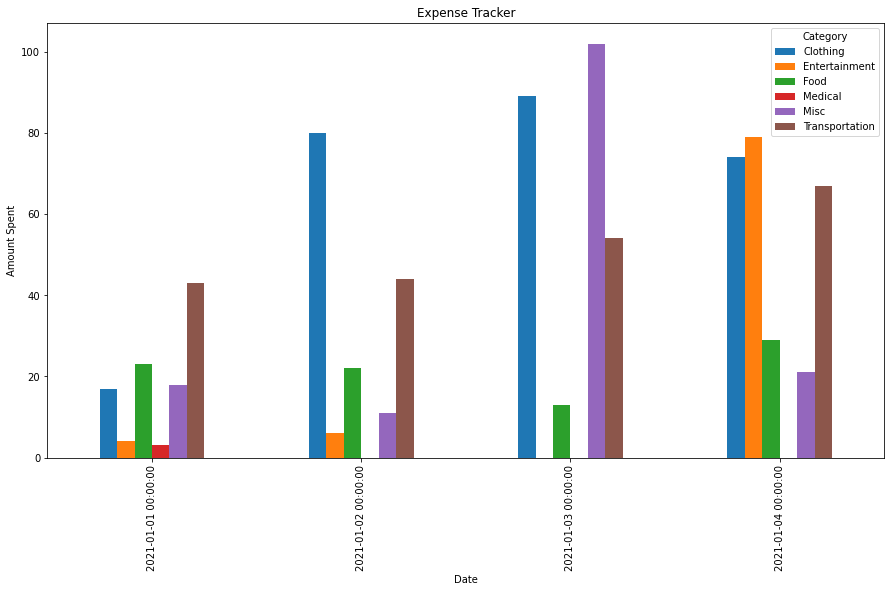

In [7]:
df_pivot.plot(kind = "bar", xlabel="Date", ylabel="Amount Spent", title="Expense Tracker",
                    figsize=(15,8))
